Image Encryption Technique Using Huffman Coding And Spatial Transformation
---

Mount the google drive folder

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required image file from the drive folder

---

In [ ]:
import os
os.chdir('/content/drive/My Drive/cs852/')
os.listdir('/content/drive/My Drive/cs852/')

['fig.jpg',
 'cipher.PNG',
 'cipher1.PNG',
 'fig1.jpg',
 'fig2.jpg',
 'cipher2.PNG',
 'cipher3.PNG',
 'fig3.png']

Read the image file from the drive

---

In [ ]:
import cv2
img = cv2.imread("fig.jpg", 0)

Display the image using matplotlib library

---

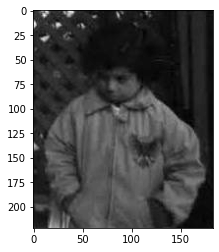

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img, cmap="gray")
plt.show()

Print out the shape of the image

---

In [ ]:
img.shape

(222, 183)

Dictionary to store the pixels

---

In [ ]:
#create a dictionary to store the frequency of each pixel in the image
original_dic = {}
pixel_dic = {}
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] in original_dic:
      original_dic[img[i][j]] += 1
    else:
      original_dic[img[i][j]] = 1
print(len(original_dic))

start = 0
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    pixel_dic[start] = original_dic[img[i][j]]
    start = start + 1
print(len(pixel_dic))

152
40626


Find the probability of each pixel and replace with the frequency

---

In [ ]:
#sort the pixel dictionary by value and print it
pixel_dic = dict(sorted(pixel_dic.items(), key=lambda item: item[1], reverse = True))

#sort the original_dic
original_dic = dict(sorted(original_dic.items(), key=lambda item: item[1], reverse = True))
count = 0
for key, value in original_dic.items():
  print(key, " -> ", value)
  count = count + 1
  if(count == 20):
    break

print('-------------------------------------')
#find probability in place of frequency
original_dic = {k: v / len(pixel_dic) for k, v in original_dic.items()}
count = 0
for key, value in original_dic.items():
  print(key, " -> ", value)
  count = count + 1
  if(count == 20):
    break

82  ->  1263
83  ->  1182
84  ->  1118
81  ->  1066
99  ->  1059
85  ->  907
98  ->  901
97  ->  789
86  ->  771
96  ->  751
132  ->  749
95  ->  736
100  ->  734
129  ->  726
80  ->  720
101  ->  719
133  ->  715
87  ->  705
134  ->  679
131  ->  675
-------------------------------------
82  ->  0.031088465514695022
83  ->  0.029094668438930733
84  ->  0.027519322601289815
81  ->  0.026239354108206568
99  ->  0.026067050657214593
85  ->  0.022325604292817408
98  ->  0.02217791562053857
97  ->  0.019421060404666964
86  ->  0.018977994387830453
96  ->  0.018485698813567666
132  ->  0.018436469256141386
95  ->  0.018116477132870575
100  ->  0.018067247575444298
129  ->  0.01787032934573918
80  ->  0.017722640673460344
101  ->  0.017698025894747206
133  ->  0.01759956677989465
87  ->  0.017353418992763256
134  ->  0.016713434746221632
131  ->  0.016614975631369076


#Encryption - Huffman Code
---

In [ ]:
#Huffman coding source code
class node:
	def __init__(self, freq, symbol, left=None, right=None):
   
    # frequency of symbol
		self.freq = freq

    # symbol name (charecter)
		self.symbol = symbol

    # node left of current node
		self.left = left

    # node right of current node
		self.right = right

    # tree direction (0/1)
		self.huff = ''

# define global dictionary to store the results
huffman_tree_dic = {}

def printNodes(node, val=''):
  # huffman code for current node
	newVal = val + str(node.huff)
 
  # if node is not an edge node
  # then traverse
	if(node.left):
		printNodes(node.left, newVal)
	if(node.right):
		printNodes(node.right, newVal)
  
  # if node is edge node then
  # update into dictionary
	if(not node.left and not node.right):
		huffman_tree_dic[node.symbol] = newVal

pixels = []
frequency = []

# extract the pixels and their frequencies from the original_dictionary
for key, value in original_dic.items():
  pixels.append(key)
  frequency.append(value)

chars = pixels
freq = frequency

# list containing unused nodes
nodes = []

# converting pixels and frequencies
# into huffman tree nodes
for x in range(len(chars)):
	nodes.append(node(freq[x], chars[x]))

while len(nodes) > 1:

  # sort all the nodes in ascending order
  # based on their frequency
	nodes = sorted(nodes, key=lambda x: x.freq)

  # pick 2 smallest nodes
	left = nodes[0]
	right = nodes[1]

  # assign directional value to these nodes
	left.huff = 0
	right.huff = 1

  # object of the class
  # combine the 2 smallest nodes to create
  # new node as their parent
	newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)

  # remove the 2 nodes and add their
  # parent as new node among others
	nodes.remove(left)
	nodes.remove(right)
	nodes.append(newNode)

# call the main function
printNodes(nodes[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in ubyte_scalars


Printing the huffman tree dictionary(Contains the huffman codes)

---

In [ ]:
# print the huffman tree dictionary
count = 0
for key, value in huffman_tree_dic.items():
  print(key, " : ", value)
  count = count + 1
  if(count > 20):
    break

112  :  0000000
78  :  0000001
125  :  000001
139  :  000010
116  :  0000110
163  :  0000111000
171  :  00001110010
74  :  0000111001100
193  :  00001110011010
197  :  00001110011011
192  :  000011100111
156  :  000011101
167  :  00001111000
209  :  0000111100100
187  :  0000111100101
218  :  0000111100110
211  :  0000111100111
217  :  00001111010000
205  :  00001111010001
224  :  00001111010010
223  :  00001111010011


Convert huffman codes to decimal values and store into new dictionary

---

In [ ]:
# define a new dictionary to store decimal values from the huffman code tree
deci_huffman = huffman_tree_dic

def binary_to_decimal(n):
  return int(n,2)

for key, value in deci_huffman.items():
  deci_huffman[key] = binary_to_decimal(value)

# print the deci_huffman(first 10 values)
count = 1
for key, value in deci_huffman.items():
  print(key, " : ", value)
  count = count + 1
  if count == 20:
    break

112  :  0
78  :  1
125  :  1
139  :  2
116  :  6
163  :  56
171  :  114
74  :  460
193  :  922
197  :  923
192  :  231
156  :  29
167  :  120
209  :  484
187  :  485
218  :  486
211  :  487
217  :  976
205  :  977


Generate output image from the huffman dictionary created above

---

Output Image -


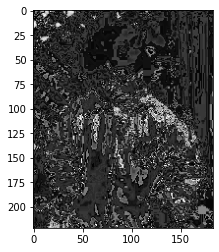

In [ ]:
img_copy = img.copy()

for i in range(img_copy.shape[0]):
  for j in range(img_copy.shape[1]):
    if (deci_huffman[img_copy[i][j]] <= 255):
      img_copy[i][j] = deci_huffman[img_copy[i][j]]

print("Output Image -")
plt.imshow(img_copy, cmap="gray")
plt.show()

Output image is generated above<br> Now we will apply spatial transformation to generate cipher image

---

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


Cipher image -


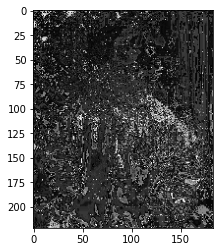

In [ ]:
img_copy2 = img_copy.copy()
for i in range(1,img_copy.shape[0]):
  for j in range(1,img_copy.shape[1]):
    x = img_copy[i][j] + img_copy[i][j-1]
    y = img_copy[i-1][j] + img_copy[i][j]
    if x < img_copy.shape[0] and y < img_copy.shape[1]:
      img_copy2[x][y] = img_copy[i][j]

print("Cipher image -")
plt.imshow(img_copy2, cmap="gray")
plt.show()

*Samples*
--

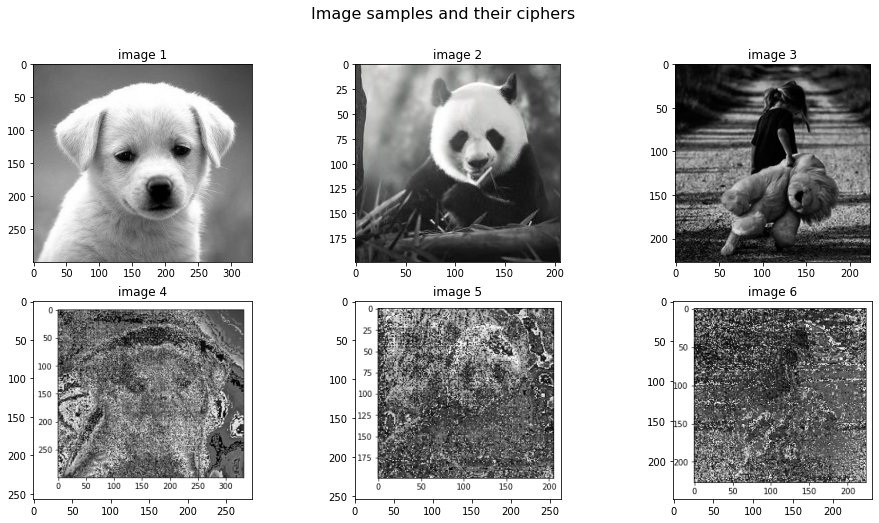

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('fig1.jpg')
img2 = plt.imread('fig2.jpg')
img3 = plt.imread('fig3.png')
img4 = plt.imread('cipher1.PNG')
img5 = plt.imread('cipher2.PNG')
img6 = plt.imread('cipher3.PNG')

images = [img1, img2, img3, img4, img5, img6]

NUM_ROWS = 2
IMGs_IN_ROW = 3

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,8))

for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        ax.imshow(images[j*IMGs_IN_ROW+i])
        ax.set_title(f'image {j*IMGs_IN_ROW+i+1}')

title = 'Image samples and their ciphers'
f.suptitle(title, fontsize=16)
plt.show()